# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Meghaan Binkley-Hopper
https://github.com/Meghaan-Binkley-Hopper/44-620Mod6Assignment.git

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [24]:
#Importing Tools
import requests
import pickle
from bs4 import BeautifulSoup
parser = 'html.parser'
import spacy
from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [6]:

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text



with open('headlight-article.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)
with open('headlight-article.pkl', 'rb') as f:
    article_html = pickle.load(f)


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [5]:
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
#Additional code example found: https://stackoverflow.com/questions/37253326/how-to-find-the-most-common-words-using-spacy

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

nlp = spacy.load('en_core_web_sm')
doc = nlp(article_element.get_text())
tokenWords = [token.text.lower()
         for token in doc
         if we_care_about(token)]
word_freq = Counter(tokenWords)
topTokens = word_freq.most_common(5)
print('5 Most Frequent Tokens:', topTokens)

5 Most Frequent Tokens: [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [8]:
#uses function in number 3
commonLemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(commonLemmas)
print('5 Most Frequent Lemmas: ', lemma_freq.most_common(5))

5 Most Frequent Lemmas:  [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [16]:
def score_sentence_by_token(sentence, interesting_token):
    sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
    for sentence in sentences:
        top_count = 0
        word_count = 0
        for token in sentence:
            if token.text.lower() in interesting_token:
                top_count += 1
        for token in sentence:
            word_count += 1
    return top_count/word_count
print(score_sentence_by_token(1, topTokens))

def score_sentence_by_lemma(sentence, interesting_lemma):
    sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
    for sentence in sentences:
        topl_count = 0
        wordl_count = 0
        for lemma in sentence:
            if token.lemma_.lower() in interesting_lemma:
                topl_count += 1
        for lemma in sentence:
            wordl_count += 1
    return topl_count/wordl_count
print(score_sentence_by_lemma(1, lemma_freq))

0.0
0.0


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

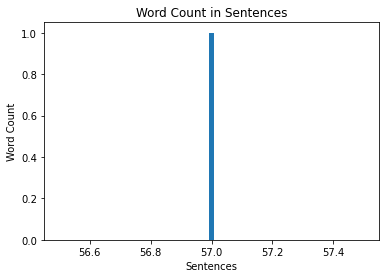

In [49]:
sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
scount = 0
count = 0
for sentence in sentences:
    scount +=1
for token in sentences:
    count += 1
x = count
y = scount
plt.hist(x, y)
plt.xlabel('Sentences')
plt.ylabel('Word Count')
plt.title('Word Count in Sentences')
plt.show()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

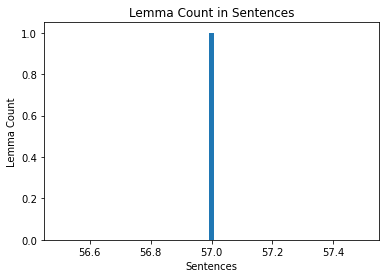

In [50]:
sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
scount = 0
count = 0
for sentence in sentences:
    scount +=1
for lemma in sentences:
    count += 1
x = count
y = scount
plt.hist(x, y)
plt.xlabel('Sentences')
plt.ylabel('Lemma Count')
plt.title('Lemma Count in Sentences')
plt.show()

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we only wanted to consider nouns the lists that I generated would not change.  We could change the code by adding an additional return statement to the we_care_about function.  I am not sure of the correct phrasing, but something like token.is_noun.

In [51]:
import os
os.system('jupyter nbconvert --to html web-scraping.ipynb')

0